In [75]:
''' Required packages. Use python3 -m pip install xxx for all the packages. '''
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
import easypyplot

In [76]:
''' Plot parameters. Change only if you want to resize the graph, etc. '''
fig_bar_width = 0.7
fig_dims = (10, 2.5)
fig_label_fontsize = 14
xy_label_size = 10
ft = fm.FontProperties('Times New Roman')
ft.set_size(fig_label_fontsize)

fig_name = 'graph_sensitivity'
fig_path = '../../4.6/'

In [77]:
csv_path = 'ETC throughput.csv'
workload_list = ['CCEH', 'CCEH-P']
scheme_list = ['Pacman', 'Harp']
workload_dict = {item: item for item in workload_list}
repl_scheme_dict = {item: item for item in scheme_list}

repl_title = 'Throughput (Mops)'
repl_name = 'graph_subblkrepl_superblksize'
repl_ylim = (0, 15)
repl_yticks = list(np.arange(repl_ylim[0], repl_ylim[1]+0.01, 3))
repl_bar_colors = [easypyplot.color.COLOR_SET[i] for i in [1, 0]]
assert len(repl_bar_colors) == len(repl_scheme_dict)

''' Load data from file. '''
csv_hd = pd.read_csv(csv_path, sep=',')
repl_xlabels = []
repl_xticks = []
repl_data_2darr = []
xtick = -1
for idx, row in csv_hd.iterrows():
    workload_fullname = row[0]
    if any(workload in workload_fullname for workload in workload_list):
        row_value = []
        for col in row.keys():
            if any(scheme in col for scheme in repl_scheme_dict):
                row_value.append(row[col])
        repl_data_2darr.append(row_value)
        repl_xlabels.append(workload_fullname)
        xtick += 1
        repl_xticks.append(xtick)
assert len(repl_data_2darr) == len(repl_xlabels) == len(repl_xticks)

pprint(repl_data_2darr)

[[6.96, 11.52], [3.67, 4.51]]


In [78]:
fig_scheme_list = ['Baseline Read Access', 'Baseline Write Access',
                   'Harp Read Access', 'Harp Write Access',]
fig_scheme_dict = {item: item for item in fig_scheme_list}

fig_title = 'ETC'
fig_ylim = (0, 2000)
fig_yticks = list(np.arange(fig_ylim[0], fig_ylim[1]+0.01, 200))
fig_bar_colors = [easypyplot.color.COLOR_SET[i] for i in [4, 0]]
design_colors = fig_bar_colors
baseline_colors = easypyplot.color.color_scale(design_colors[0], 2, 0.5, 0.75)[::-1]
igc_colors = easypyplot.color.color_scale(design_colors[1], 2, 0.5, 0.75)[::-1]
design_len = 2
assert len(fig_bar_colors) == design_len

In [79]:
''' Load key space data '''
csv_path = 'ETC breakdown.csv'
workload_list_KEYS = ['CCEH', 'CCEH-P']
workload_dict = {item: item for item in workload_list_KEYS}

# pprint(fig_yticks)
csv_hd = pd.read_csv(csv_path, sep=',')
fig_xlabels_KEYS = []
baseline_xticks_KEYS = []
fig_data_KEYS = []
xtick = -1
for idx, row in csv_hd.iterrows():
    workload_fullname = row[0]
    if any(workload == workload_fullname for workload in workload_list_KEYS):
        row_value = []
        for col in row.keys():
            if any(scheme in col for scheme in fig_scheme_dict):
                row_value.append(row[col])
        fig_data_KEYS.append(row_value)
        fig_xlabels_KEYS.append(workload_fullname)
        xtick += 2
        baseline_xticks_KEYS.append(xtick)
assert len(fig_data_KEYS) == len(fig_xlabels_KEYS) == len(baseline_xticks_KEYS)
igc_xticks_KEYS = [item + fig_bar_width for item in baseline_xticks_KEYS]

pprint(fig_data_KEYS)

''' Layout hit rate '''
layout_scheme_list = ['Baseline GC', 'Harp GC']
layout_scheme_dict = {item: item for item in layout_scheme_list}
csv_hd = pd.read_csv(csv_path, sep=',')
layout_xlabels_KEYS = []
layout_xticks_KEYS = []
layout_data_KEYS = []
xtick = -1
for idx, row in csv_hd.iterrows():
    workload_fullname = row[0]
    if any(workload == workload_fullname for workload in workload_list_KEYS):
        row_value = []
        for col in row.keys():
            if any(scheme in col for scheme in layout_scheme_dict):
                row_value.append(row[col])
        layout_data_KEYS.append(row_value)
        layout_xlabels_KEYS.append(workload_fullname)
        xtick += 1
        layout_xticks_KEYS.append(xtick)
assert len(layout_data_KEYS) == len(layout_xlabels_KEYS) == len(layout_xticks_KEYS)

pprint(layout_data_KEYS)

[[834.22, 132.6, 392.37, 109.16], [908.34, 118.53, 393.53, 104.45]]
[[12730, 5987], [13861, 6004]]


[12730 13861]
[12730 13861]


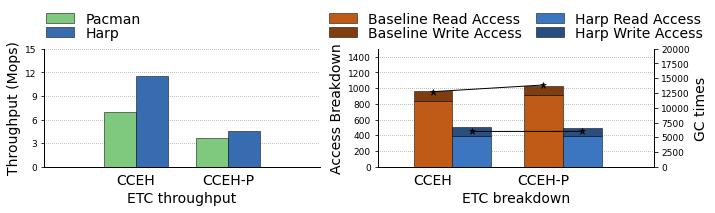

In [80]:
''' Two-level Repl: Ploting script '''
pp, fig = easypyplot.pdf.plot_setup(fig_name, fig_dims)
repl_ax = fig.add_subplot(1, 2, 1)
easypyplot.format.turn_off_box(repl_ax)
repl_h = easypyplot.barchart.draw(
    repl_ax, repl_data_2darr,
    width=fig_bar_width,
    breakdown=False,
    group_names=repl_xlabels,
    xticks=repl_xticks,
    xticklabelfontsize=fig_label_fontsize,
    xticklabelrotation=0,
    # prop=ft,
    colors=repl_bar_colors)
''' x axis '''
repl_ax.set_xlim([repl_ax.get_xticks()[0] - 1, repl_ax.get_xticks()[-1] + 1])
repl_ax.set_xticks(repl_xticks)
repl_ax.set_xticklabels(repl_xlabels, fontsize=fig_label_fontsize, fontproperties=ft)
repl_ax.xaxis.set_ticks_position('none') # Comment this and the next line for visible ticks
# repl_ax.tick_params(direction='in') # [in, out, inout]
# repl_ax.set_xlabel(repl_title)
''' y axis '''
repl_ax.yaxis.grid(True)
repl_ax.set_ylim(repl_ylim)
repl_ax.set_yticks(repl_yticks)
repl_ax.set_ylabel(repl_title, multialignment='center', fontproperties=ft)
repl_ax.set_xlabel('ETC throughput', fontproperties=ft)
''' legend '''
legend = [repl_scheme_dict[item] for item in repl_scheme_dict]
fig.legend(repl_h, legend, loc='upper left', bbox_to_anchor=(0.05, 1.2),
        ncol=1, frameon=False, prop=ft, columnspacing=0.3, labelspacing=0)
repl_ax.tick_params(labelsize=xy_label_size)

''' plot key space '''
fig_ax = fig.add_subplot(1 ,2 ,2)
fig_ax2 = fig_ax.twinx()
easypyplot.format.turn_off_box(fig_ax, twinx_axes=fig_ax2)
fig_data_nparr = np.array(fig_data_KEYS)
baseline_acc_data = fig_data_nparr[:, :2]
igc_acc_data = fig_data_nparr[:, 2:4]
fig_h = []
fig_h += easypyplot.barchart.draw(
    fig_ax, baseline_acc_data,
    width=fig_bar_width,
    breakdown=True,
    group_names=fig_xlabels_KEYS,
    xticks=baseline_xticks_KEYS,
    xticklabelfontsize=fig_label_fontsize,
    xticklabelrotation=0,
    # prop=ft,
    colors=baseline_colors)
fig_h += easypyplot.barchart.draw(
    fig_ax, igc_acc_data,
    width=fig_bar_width,
    breakdown=True,
    group_names=fig_xlabels_KEYS,
    xticks=igc_xticks_KEYS,
    xticklabelfontsize=fig_label_fontsize,
    xticklabelrotation=0,
    # prop=ft, 
    colors=igc_colors)
fig_h2 = []
# easypyplot.format.turn_off_box(fig)
layout_data_nparr = np.array(layout_data_KEYS)
layout_xticks = [baseline_xticks_KEYS, igc_xticks_KEYS]
for group_id in range(design_len):
    print(layout_data_nparr[:, 0])
    fig_h2 += fig_ax2.plot(layout_xticks[group_id], layout_data_nparr[:, group_id],
                marker='*',
                linewidth = '1.0',
                color = '#000000',
                # color = baseline_colors[0],
                markersize = '7.0',
                # prop = ft
                )
''' x axis '''
fig_ax.set_xlim([fig_ax.get_xticks()[0] - 1, fig_ax.get_xticks()[-1] + 1])
fig_ax.set_xticks(baseline_xticks_KEYS)
fig_ax.set_xlim([0, len(workload_list_KEYS) * design_len + 1])
fig_ax.set_xticklabels(fig_xlabels_KEYS, fontsize=fig_label_fontsize, fontproperties=ft)
fig_ax.xaxis.set_ticks_position('none') # Comment this and the next line for visible ticks
# fig_ax.tick_params(direction='in') # [in, out, inout]
fig_ax.set_xlabel('ETC breakdown', fontproperties=ft)
''' y axis '''
fig_ax.yaxis.grid(True)
fig_ylim_ = (0, 1500)
fig_yticks_ = list(np.arange(fig_ylim_[0], fig_ylim_[1]+0.01, 200))
fig_ax.set_ylim(fig_ylim_)
fig_ax.set_yticks(fig_yticks_)
fig_ax.set_ylabel('Access Breakdown', multialignment='center', fontproperties=ft)
layout_ylim = [0., 20000.]
fig_ax2.set_ylim(layout_ylim)
fig_ax2.set_yticks(list(np.arange(layout_ylim[0], layout_ylim[1]+0.01, 2500)))
fig_ax2.set_ylabel('GC times', multialignment='center', fontproperties=ft)
fig_ax.tick_params(labelsize=xy_label_size)
fig_ax2.tick_params(labelsize=xy_label_size)

''' legend '''
legend = [fig_scheme_dict[item] for item in fig_scheme_dict]
fig.legend(fig_h, legend, loc='upper center', bbox_to_anchor=(0.72, 1.2),
        ncol=2, frameon=False, prop=ft, columnspacing=1, labelspacing=0)


''' last resize '''
# fig.subplots_adjust(hspace=1)
plt.tight_layout()
# easypyplot.format.resize_ax_box(repl_ax, hratio=0.8)
# easypyplot.format.resize_ax_box(sbsize_ax, hratio=0.8)


In [81]:
''' Save figures'''
fig.savefig(fig_path + fig_name+'.pdf', format="pdf", bbox_inches = 'tight')
# easypyplot.pdf.plot_teardown(pp) # it generates wierd chopped figures